# Overview

This notebook contains an example of how to read, plot and work with Level 2 ocean colour satellite data.

# Importing modules

We're going to import a few modules for working with the satellite data.

+ `xarray` for importing and manipulating the data
+ `numpy` for working with data arrays
+ `matplotlib` for plotting
+ `cartopy` for mapping
+ `%matplotlib inline` is used so that the plots are output into the notebook below the code that generates them

In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

# Importing data

Here's the path to the satellite file. In this case I'm using a file on my local computer, so just providing the path to where the file is saved on my computer. This file is on the Google Drive, can find it here (if you want to download it to your computer): https://drive.google.com/file/d/17euJUMxXw0tx8ATiFurfvGPJY7WvHW_M/view?usp=sharing

In [8]:
filedir =  '../data/satellite/aqua/2017/155/A2017155173500.L2'

## Brief netCDF background

NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. NetCDF files can organize variables, dimensions, and attributes in hierarchical "groups". These groups are kind of like mini-filesystems all within one file - here's a schematic for an example NetCDF file:

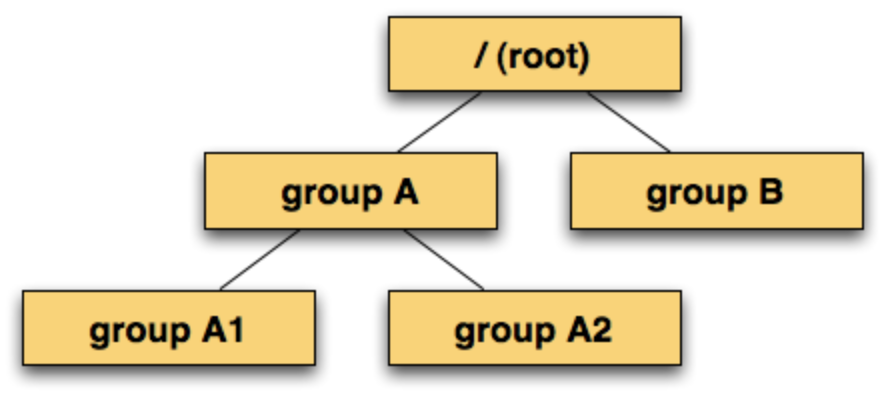

Whoever makes a netCDF file can arrange the data within it however they like which can make it challenging when working with netCDF files that have come from multiple sources.

In the case of ocean color satellite data, there's some information here: https://oceancolor.gsfc.nasa.gov/docs/format/l2nc/. Section 4 describes the different groups used in the Level 2 satellite data files. 

The point in all this background is: we need to import data from two different groups within the netCDF files.

## Interacting with different netCDF groups

Just to load the basic attributes of the files:

In [11]:
satAtts = xr.load_dataset(filedir)

In [12]:
satAtts

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    title:                          MODISA Level-2 Data
    product_name:                   A2017155173500.L2
    processing_version:             Unspecified
    equatorCrossingLongitude:       110.026794
    orbit_number:                   80247
    history:                        l2gen par=A2017155173500.par
    instrument:                     MODIS
    platform:                       Aqua
    Conventions:                    CF-1.6 ACDD-1.3
    license:                        https://science.nasa.gov/earth-science/ea...
    naming_authority:               gov.nasa.gsfc.sci.oceandata
    id:                             L2/A2017155173500.L2
    date_created:                   2020-05-14T13:16:19.000Z
    keywords_vocabulary:            NASA Global Change Master Directory (GCMD...
    keywords:                       Earth Science > Oceans > Ocean Optics > O...
    standard_name_vocabulary:       CF Standard Name Ta

Unfortunately, `xarray` does not have the functionality to obtain information about the different groups within a netCDF file, so if we didn't know the names of our groups, we would have to use a different method to figure out the group names e.g. using the `netCDF4` python module. **But** if you do know the names of your groups beforehand (which we do!), then you can just import a group as an `xarray` dataset.

Below, we're importing 

1. the "geophysical" data i.e. all the different products e.g. POC, chlorophyll, PIC, etc
2. the "navigation" data i.e. the lats and lons

In [13]:
satData = xr.load_dataset(filedir,group='geophysical_data')
satNav = xr.load_dataset(filedir,group='navigation_data')

What do these look like?

In [6]:
satData

<xarray.Dataset>
Dimensions:       (number_of_lines: 410, pixels_per_line: 453)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables:
    Rrs_412       (number_of_lines, pixels_per_line) float32 0.0043900013 ... nan
    Rrs_443       (number_of_lines, pixels_per_line) float32 0.0053240024 ... nan
    Rrs_469       (number_of_lines, pixels_per_line) float32 0.0058940016 ... nan
    Rrs_488       (number_of_lines, pixels_per_line) float32 0.0058620013 ... nan
    Rrs_531       (number_of_lines, pixels_per_line) float32 0.003931999 ... nan
    Rrs_547       (number_of_lines, pixels_per_line) float32 0.003304001 ... nan
    Rrs_555       (number_of_lines, pixels_per_line) float32 0.0028319992 ... nan
    Rrs_645       (number_of_lines, pixels_per_line) float32 0.00042800233 ... nan
    Rrs_667       (number_of_lines, pixels_per_line) float32 0.00036999956 ... nan
    Rrs_678       (number_of_lines, pixels_per_line) float32 0.00038800016 ... nan
    pic           

In [7]:
satNav

<xarray.Dataset>
Dimensions:       (number_of_lines: 410, pixel_control_points: 453)
Dimensions without coordinates: number_of_lines, pixel_control_points
Data variables:
    longitude     (number_of_lines, pixel_control_points) float32 -65.13888 ... -72.12401
    latitude      (number_of_lines, pixel_control_points) float32 42.07641 ... 44.845573
    cntl_pt_cols  (pixel_control_points) float64 1.0 2.0 3.0 ... 452.0 453.0
    cntl_pt_rows  (number_of_lines) float64 1.0 2.0 3.0 ... 408.0 409.0 410.0
    tilt          (number_of_lines) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    gringpointlongitude:  [-65.13888 -70.71899 -72.12401 -66.21208]
    gringpointlatitude:   [42.07641  41.2687   44.845573 45.702896]
    gringpointsequence:   [1 2 3 4]

# Working with the satellite data


## Extracting a data variable

Each data variable within both `satNav` and `satData` are arrays. You can pull out one data variable in a couple of ways:

In [16]:
satData.poc

<xarray.DataArray 'poc' (number_of_lines: 410, pixels_per_line: 453)>
array([[119.6001  , 122.6001  , 122.6001  , ...,        nan,        nan,
               nan],
       [123.19971 , 126.6001  , 128.1997  , ...,        nan,        nan,
               nan],
       [127.      , 130.1997  , 126.799805, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Dimensions without coordinates: number_of_lines, pixels_per_line
Attributes:
    long_name:  Particulate Organic Carbon, D. Stramski, 2007 (443/555 version)
    units:      mg m^-3
    valid_min:  -32000
    valid_max:  -27000
    reference:  Stramski, D., et al. "Relationships between the surface conce...

or:

In [17]:
satData['poc']

<xarray.DataArray 'poc' (number_of_lines: 410, pixels_per_line: 453)>
array([[119.6001  , 122.6001  , 122.6001  , ...,        nan,        nan,
               nan],
       [123.19971 , 126.6001  , 128.1997  , ...,        nan,        nan,
               nan],
       [127.      , 130.1997  , 126.799805, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Dimensions without coordinates: number_of_lines, pixels_per_line
Attributes:
    long_name:  Particulate Organic Carbon, D. Stramski, 2007 (443/555 version)
    units:      mg m^-3
    valid_min:  -32000
    valid_max:  -27000
    reference:  Stramski, D., et al. "Relationships between the surface conce...

If you want just the data array, the add `.data` to your command:

In [18]:
satData.poc.data

array([[119.6001  , 122.6001  , 122.6001  , ...,        nan,        nan,
               nan],
       [123.19971 , 126.6001  , 128.1997  , ...,        nan,        nan,
               nan],
       [127.      , 130.1997  , 126.799805, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

## Interacting with the data variable

Now we have an array, you can interact with it using `numpy` or other basic array commands. For example, if we want to select part of the array:



In [19]:
poc = satData.poc.data
poc[100:105,100:105]

array([[153.3999, 153.    , 156.6001, 153.    , 154.6001],
       [148.7998, 153.1997, 154.    , 150.3999, 150.7998],
       [147.7998, 147.7998, 152.7998, 152.6001, 147.    ],
       [150.7998, 151.7998, 153.3999, 147.7998, 148.1997],
       [150.    , 150.1997, 157.3999, 149.7998, 148.7998]], dtype=float32)

Or if we want to find the mean value of the whole array (ignoring the `nan` values):

In [22]:
np.nanmean(poc)

195.0864

# Plotting the data

You can plot pretty easily from the `xarray` dataset/data array:

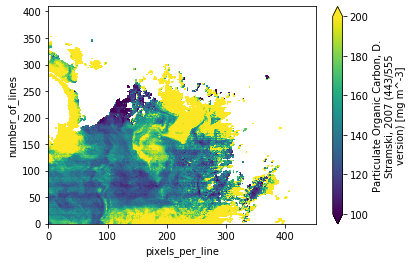

In [26]:
# vmin and vmax specify the limits of the colorscale
satData.poc.plot(vmin=100,vmax=200)

But it's actually back to front... Canada is on the left-hand side of the plot and it should be on the right, plus north and south are also switched around. So we need to transform the data and plot it in the correct orientation. To do this we can use a mapping package. The module I used to use for mapping was recently deprecated in favor of the `Cartopy` project. I'm not as familiar with `Cartopy`, but here's some code for making a map:

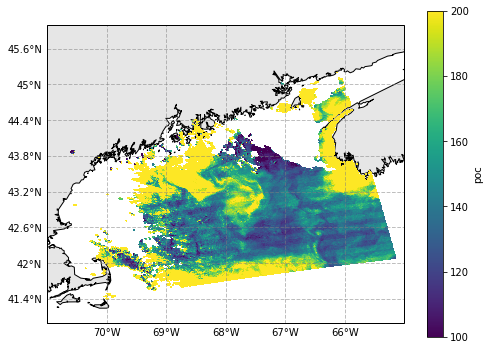

In [44]:
# setting up the figure axes with the mapping projection we want to use
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set lat and long limits here
ax.set_extent([-71,-65,41,46])

#adding land
land = cfeature.GSHHSFeature(
        scale='i',lw=1,
        facecolor=[0.9,0.9,0.9])
ax.add_feature(land)

#plotting the satellite data
plt.pcolormesh(satNav.longitude.data,satNav.latitude.data, poc, 
             transform=ccrs.PlateCarree(),zorder=2,
              vmin=100,vmax=200)
plt.colorbar(label='poc')


#doing the gridlines, haven't figured out how to
#do the xticks neatly, so for now, I'm keeping the 
#grey gridlines on the image
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER